In [ ]:
#https://cloud.tencent.com/developer/article/1625932
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


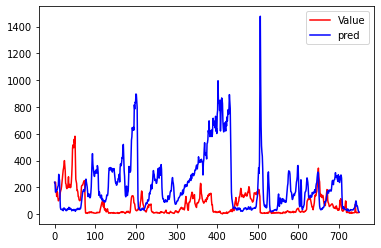

In [ ]:
pf=pd.read_csv('https://raw.githubusercontent.com/weixiabing/Innovative-practice/main/library/csv/pm/beijing_final1.csv')
pf2=pd.read_csv('https://raw.githubusercontent.com/weixiabing/Innovative-practice/main/library/csv/pm/beijing_final2.csv')

model = ExponentialSmoothing(pf["Value"], trend="add", seasonal="add", seasonal_periods=8760,damped=True).fit(use_boxcox=True)
pred = model.forecast(750)
#pred.to_csv("library/csv/pm/beijing_result.csv", encoding="utf_8_sig")
plt.figure()
plt.plot(range(750),pf2['Value'][0:750], color='r', label='Value')
plt.plot(range(750), pred , color='b', label='pred')

plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(pf2['Value'][0:750], pred))
rms


283.5081537610147

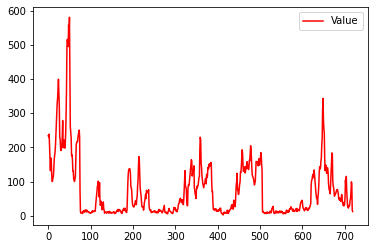

In [ ]:
plt.figure()
plt.plot(range(720),pf2['Value'][0:720], color='r', label='Value')
#plt.plot(range(720), pred1 , color='b', label='pred1')



plt.legend()
plt.show()

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b